In [ ]:
!pip install numpy scipy matplotlib

Creating and analyzing a Möbius strip...
Calculated surface area: 10.0684 square units
Total edge length: 12.6282 units
Generating 3D visualization...


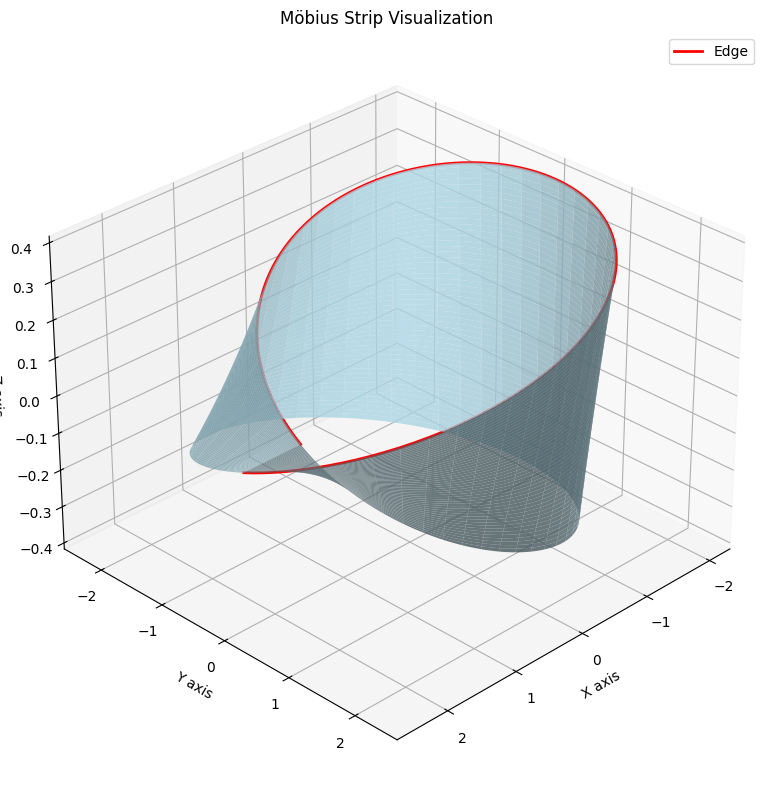

In [ ]:
import numpy as np
from scipy.integrate import simpson
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    """Models a Möbius strip with customizable parameters and computes its geometric properties."""

    def __init__(self, R=1.0, w=0.5, n=100):
        """Initialize with radius R, width w, and resolution n."""
        self.R = R  # Distance from center to middle of strip
        self.w = w  # Width of the strip
        self.n = n  # Number of points for calculations

        # Create parameter grids - u goes around the loop, v across the width
        self.u = np.linspace(0, 2*np.pi, n)  # Full circle
        self.v = np.linspace(-w/2, w/2, n)   # Across the width
        self.U, self.V = np.meshgrid(self.u, self.v)  # 2D grids for calculations

        # Calculate 3D coordinates
        self.x, self.y, self.z = self._calculate_coordinates()

    def _calculate_coordinates(self):
        """Compute x,y,z points using the parametric equations."""
        # Using intermediate variable for u/2 makes the equations cleaner
        u_half = self.U / 2

        # Main parametric equations
        x_coords = (self.R + self.V * np.cos(u_half)) * np.cos(self.U)
        y_coords = (self.R + self.V * np.cos(u_half)) * np.sin(self.U)
        z_coords = self.V * np.sin(u_half)

        return x_coords, y_coords, z_coords

    def compute_surface_area(self):
        """Numerically computes the total surface area."""
        # Calculate step sizes for integration
        du = (2*np.pi) / (self.n - 1)  # u goes from 0 to 2π
        dv = self.w / (self.n - 1)      # v goes from -w/2 to w/2

        # Get partial derivatives using central differences
        x_u = np.gradient(self.x, du, axis=1)
        y_u = np.gradient(self.y, du, axis=1)
        z_u = np.gradient(self.z, du, axis=1)

        x_v = np.gradient(self.x, dv, axis=0)
        y_v = np.gradient(self.y, dv, axis=0)
        z_v = np.gradient(self.z, dv, axis=0)

        # Cross product components (surface normal vectors)
        cross_x = y_u*z_v - z_u*y_v
        cross_y = z_u*x_v - x_u*z_v
        cross_z = x_u*y_v - y_u*x_v

        # Magnitude of cross product gives area scaling factor
        area_elements = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

        # Integrate over the entire surface
        total_area = simpson(simpson(area_elements, dx=dv), dx=du)

        return total_area

    def compute_edge_length(self):
        """Calculates the length of the single continuous edge."""
        # The edge is where v = w/2 (could also use v = -w/2)
        edge_v = self.w/2
        edge_u = np.linspace(0, 2*np.pi, self.n)

        # Calculate edge coordinates
        u_half = edge_u / 2
        x_edge = (self.R + edge_v * np.cos(u_half)) * np.cos(edge_u)
        y_edge = (self.R + edge_v * np.cos(u_half)) * np.sin(edge_u)
        z_edge = edge_v * np.sin(u_half)

        # Get derivatives along the edge
        dx = np.gradient(x_edge, edge_u)
        dy = np.gradient(y_edge, edge_u)
        dz = np.gradient(z_edge, edge_u)

        # Differential length elements
        dl = np.sqrt(dx**2 + dy**2 + dz**2)

        # Total length by integration
        length = simpson(dl, edge_u)

        return length

    def visualize(self):
        """Creates a 3D plot of the Möbius strip."""
        plt.figure(figsize=(10, 8))
        ax = plt.axes(projection='3d')

        # Plot the surface with some transparency
        ax.plot_surface(self.x, self.y, self.z, color='lightblue', alpha=0.8)

        # Highlight the edge in red
        edge_v = self.w/2
        u_half = self.u / 2
        x_edge = (self.R + edge_v * np.cos(u_half)) * np.cos(self.u)
        y_edge = (self.R + edge_v * np.cos(u_half)) * np.sin(self.u)
        z_edge = edge_v * np.sin(u_half)
        ax.plot(x_edge, y_edge, z_edge, 'r-', linewidth=2, label='Edge')

        # Adjust viewing angle to show the twist
        ax.view_init(elev=30, azim=45)

        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        ax.set_title('Möbius Strip Visualization')
        ax.legend()
        plt.tight_layout()
        plt.show()

# Example usage with some test values
if __name__ == "__main__":
    print("Creating and analyzing a Möbius strip...")

    # Create a medium-sized strip with good resolution
    my_strip = MobiusStrip(R=2.0, w=0.8, n=200)

    # Calculate and display properties
    area = my_strip.compute_surface_area()
    print(f"Calculated surface area: {area:.4f} square units")

    edge_len = my_strip.compute_edge_length()
    print(f"Total edge length: {edge_len:.4f} units")

    # Show the 3D visualization
    print("Generating 3D visualization...")
    my_strip.visualize()

In [1]:
!git config --global user.email "balareddygursharan8.com"
!git config --global user.name "Gursharan-Reddy"


In [2]:
!git clone https://github.com/Gursharan-Reddy/Karkhana.git

Cloning into 'Karkhana'...


In [7]:
!mv Karkhana.ipynb Karkhana/

mv: cannot stat 'Karkhana.ipynb': No such file or directory


In [5]:
!ls

Karkhana  sample_data
